<a href="https://colab.research.google.com/github/rq991020/python-01/blob/master/wine%E5%88%86%E7%B1%BB%E7%AE%97%E6%B3%95%E5%AF%B9%E6%AF%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files

# 选择要上传的文件
uploaded = files.upload()

# 打印上传的文件信息
for filename in uploaded.keys():
    print('已上传文件名:', filename)

Saving winequality-red.xlsx to winequality-red.xlsx
已上传文件名: winequality-red.xlsx


In [13]:
import os
uploaded_files = list(uploaded.keys())  # 获取上传的文件名列表
file_path = os.path.join('/content', uploaded_files[0])  # 获取文件的完整路径
import pandas as pd

data = pd.read_excel(uploaded_files[0])

In [17]:
from typing import Counter
from matplotlib import colors, markers
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# 判断模型预测准确率的模型
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# 设置绘图内的文字
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

#path = "D:\\桌面\\winequality-red.xlsx"
# path=r"C:\\Users\\zt\\Desktop\\winequality\\winequality-red.csv"#您要读取的文件路径
# exceldata = np.loadtxt(
#     path,
#     dtype=str,
#     delimiter=";",#每列数据的隔开标志
#     skiprows=1
# )

# print(Counter(exceldata[:,-1]))

exceldata = pd.read_excel('winequality-red.xlsx')
print(exceldata)

print(exceldata[exceldata.duplicated()])
print(exceldata.duplicated().sum())


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [18]:
# 去重
exceldata = exceldata.drop_duplicates()

# 判空去空
print(exceldata.isnull())
print(exceldata.isnull().sum)
print(exceldata[~exceldata.isnull()])
exceldata = exceldata[~exceldata.isnull()]

print(Counter(exceldata["quality"]))

# smote

# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE

# 定义SMOTE模型，random_state相当于随机数种子的作用


X, y = np.split(exceldata, (11,), axis=1)
smo = SMOTE(random_state=10)

x_smo, y_smo = SMOTE().fit_resample(X.values, y.values)

print(Counter(y_smo))

x_smo = pd.DataFrame({"fixed acidity": x_smo[:, 0], "volatile acidity": x_smo[:, 1], "citric acid": x_smo[:, 2],
                      "residual sugar": x_smo[:, 3], "chlorides": x_smo[:, 4], "free sulfur dioxide": x_smo[:, 5],
                      "total sulfur dioxide": x_smo[:, 6], "density": x_smo[:, 7], "pH": x_smo[:, 8],
                      "sulphates": x_smo[:, 9], " alcohol": x_smo[:, 10]})
y_smo = pd.DataFrame({"quality": y_smo})
print(x_smo.shape)
print(y_smo.shape)
# 合并
exceldata = pd.concat([x_smo, y_smo], axis=1)
print(exceldata)

# 分割X，y
X, y = np.split(exceldata, (11,), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.7)
print("训练集大小：%d" % (X_train.shape[0]))
print("测试集大小：%d" % (X_test.shape[0]))

def func_mlp(X_train,X_test,y_train,y_test):
    print("神经网络MLP:")
    kk = [i for i in range(200,500,50) ] #迭代次数
    t_precision = []
    t_recall = []
    t_accuracy = []
    t_f1_score = []
    for n in kk:
        method = MLPClassifier(activation="tanh",solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=n)
        method.fit(X_train,y_train)
        MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
                        beta_2=0.999, early_stopping=False, epsilon=1e-08,
                        hidden_layer_sizes=(5, 2), learning_rate='constant',
                        learning_rate_init=0.001, max_iter=n, momentum=0.9,
                        nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
                        solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
                        warm_start=False)
        y_predict = method.predict(X_test)
        t =classification_report(y_test, y_predict, target_names=['3','4','5','6','7','8'],output_dict=True)
        print(t)
        t_accuracy.append(t["accuracy"])
        t_precision.append(t["weighted avg"]["precision"])
        t_recall.append(t["weighted avg"]["recall"])
        t_f1_score.append(t["weighted avg"]["f1-score"])
    plt.figure("数据未处理MLP")
    plt.subplot(2,2,1)
    #添加文本 #x轴文本
    plt.xlabel('迭代次数')
    #y轴文本
    plt.ylabel('accuracy')
    #标题
    plt.title('不同迭代次数下的accuracy')
    plt.plot(kk,t_accuracy,color="r",marker="o",ls="-")
    plt.yticks(np.arange(0,1,0.1))

    plt.subplot(2,2,2)
    #添加文本 #x轴文本
    plt.xlabel('迭代次数')
    #y轴文本
    plt.ylabel('precision')
    #标题
    plt.title('不同迭代次数下的precision')
    plt.plot(kk,t_precision,color="r",marker="o",ls="-")
    plt.yticks(np.arange(0,1,0.1))

    plt.subplot(2,2,3)
    #添加文本 #x轴文本
    plt.xlabel('迭代次数')
    #y轴文本
    plt.ylabel('recall')
    #标题
    plt.title('不同迭代次数下的recall')
    plt.plot(kk,t_recall,color="r",marker="o",ls="-")
    plt.yticks(np.arange(0,1,0.1))

    plt.subplot(2,2,4)
    #添加文本 #x轴文本
    plt.xlabel('迭代次数')
    #y轴文本
    plt.ylabel('f1_score')
    #标题
    plt.title('不同迭代次数下的f1_score')
    plt.plot(kk,t_f1_score,color="r",marker="o",ls="-")
    plt.yticks(np.arange(0,1,0.1))

    plt.show()


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
5             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1593          False             False        False           False      False   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [19]:
def func_svc(X_train, X_test, y_train, y_test):
    print("向量机：")
    kk = ["linear", "poly", "rbf"]  # 核函数类型
    t_precision = []
    t_recall = []
    t_accuracy = []
    t_f1_score = []
    for n in kk:
        method = SVC(kernel=n, random_state=0)
        method = method.fit(X_train, y_train)
        y_predic = method.predict(X_test)
        t = classification_report(y_test, y_predic, target_names=['3', '4', '5', '6', '7', '8'], output_dict=True)
        print(t)
        t_accuracy.append(t["accuracy"])
        t_precision.append(t["weighted avg"]["precision"])
        t_recall.append(t["weighted avg"]["recall"])
        t_f1_score.append(t["weighted avg"]["f1-score"])
    plt.figure("数据未处理向量机")
    plt.subplot(2, 2, 1)
    # 添加文本 #x轴文本
    plt.xlabel('核函数类型')
    # y轴文本
    plt.ylabel('accuracy')
    # 标题
    plt.title('不同核函数类型下的accuracy')
    plt.plot(kk, t_accuracy, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 2)
    # 添加文本 #x轴文本
    plt.xlabel('核函数类型')
    # y轴文本
    plt.ylabel('precision')
    # 标题
    plt.title('不同核函数类型下的precision')
    plt.plot(kk, t_precision, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 3)
    # 添加文本 #x轴文本
    plt.xlabel('核函数类型')
    # y轴文本
    plt.ylabel('recall')
    # 标题
    plt.title('不同核函数类型下的recall')
    plt.plot(kk, t_recall, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 4)
    # 添加文本 #x轴文本
    plt.xlabel('核函数类型')
    # y轴文本
    plt.ylabel('f1_score')
    # 标题
    plt.title('不同核函数类型下的f1_score')
    plt.plot(kk, t_f1_score, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.show()

In [20]:
def func_classtree(X_train, X_test, y_train, y_test):
    print("决策树：")
    kk = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # 决策树最大深度
    t_precision = []
    t_recall = []
    t_accuracy = []
    t_f1_score = []
    for n in kk:
        method = tree.DecisionTreeClassifier(criterion="gini", max_depth=n)
        method.fit(X_train, y_train)
        predic = method.predict(X_test)
        print("method.predict:%f" % method.score(X_test, y_test))

        t = classification_report(y_test, predic, target_names=['3', '4', '5', '6', '7', '8'], output_dict=True)
        print(t)
        t_accuracy.append(t["accuracy"])
        t_precision.append(t["weighted avg"]["precision"])
        t_recall.append(t["weighted avg"]["recall"])
        t_f1_score.append(t["weighted avg"]["f1-score"])
    plt.figure("数据未处理决策树")
    plt.subplot(2, 2, 1)
    # 添加文本 #x轴文本
    plt.xlabel('决策树最大深度')
    # y轴文本
    plt.ylabel('accuracy')
    # 标题
    plt.title('不同决策树最大深度下的accuracy')
    plt.plot(kk, t_accuracy, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 2)
    # 添加文本 #x轴文本
    plt.xlabel('决策树最大深度')
    # y轴文本
    plt.ylabel('precision')
    # 标题
    plt.title('不同决策树最大深度下的precision')
    plt.plot(kk, t_precision, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 3)
    # 添加文本 #x轴文本
    plt.xlabel('决策树最大深度')
    # y轴文本
    plt.ylabel('recall')
    # 标题
    plt.title('不同决策树最大深度下的recall')
    plt.plot(kk, t_recall, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 4)
    # 添加文本 #x轴文本
    plt.xlabel('决策树最大深度')
    # y轴文本
    plt.ylabel('f1_score')
    # 标题
    plt.title('不同决策树最大深度下的f1_score')
    plt.plot(kk, t_f1_score, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.show()


In [21]:

def func_adaboost(X_train, X_test, y_train, y_test):
    print("提升树：")
    kk = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    t_precision = []
    t_recall = []
    t_accuracy = []
    t_f1_score = []
    for n in range(100, 200, 200):
        for k in kk:
            print("迭代次数为：%d\n学习率：%.2f" % (n, k))
            bdt = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2, min_samples_split=20),
                                     algorithm="SAMME",
                                     n_estimators=n, learning_rate=k)
            bdt.fit(X_train, y_train)
            # 迭代100次 ,学习率为0.1
            y_pred = bdt.predict(X_test)
            print("训练集score：%lf" % (bdt.score(X_train, y_train)))
            print("测试集score：%lf" % (bdt.score(X_test, y_test)))
            print(bdt.feature_importances_)

            t = classification_report(y_test, y_pred, target_names=['3', '4', '5', '6', '7', '8'], output_dict=True)
            print(t)
            t_accuracy.append(t["accuracy"])
            t_precision.append(t["weighted avg"]["precision"])
            t_recall.append(t["weighted avg"]["recall"])
            t_f1_score.append(t["weighted avg"]["f1-score"])
    plt.figure("数据未处理迭代100次(adaboost)")
    plt.subplot(2, 2, 1)
    # 添加文本 #x轴文本
    plt.xlabel('学习率')
    # y轴文本
    plt.ylabel('accuracy')
    # 标题
    plt.title('不同学习率下的accuracy')
    plt.plot(kk, t_accuracy, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 2)
    # 添加文本 #x轴文本
    plt.xlabel('学习率')
    # y轴文本
    plt.ylabel('precision')
    # 标题
    plt.title('不同学习率下的precision')
    plt.plot(kk, t_precision, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 3)
    # 添加文本 #x轴文本
    plt.xlabel('学习率')
    # y轴文本
    plt.ylabel('recall')
    # 标题
    plt.title('不同学习率下的recall')
    plt.plot(kk, t_recall, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 4)
    # 添加文本 #x轴文本
    plt.xlabel('学习率')
    # y轴文本
    plt.ylabel('f1_score')
    # 标题
    plt.title('不同学习率下的f1_score')
    plt.plot(kk, t_f1_score, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.show()


In [22]:

# inX 用于分类的输入向量
# dataSet表示训练样本集
# 标签向量为labels，标签向量的元素数目和矩阵dataSet的行数相同
# 参数k表示选择最近邻居的数目
def classify0(inx, data_set, labels, k):
    """实现k近邻"""
    data_set_size = data_set.shape[0]  # 数据集个数，即行数
    diff_mat = np.tile(inx, (data_set_size, 1)) - data_set  # 各个属性特征做差
    sq_diff_mat = diff_mat ** 2  # 各个差值求平方
    sq_distances = sq_diff_mat.sum(axis=1)  # 按行求和
    distances = sq_distances ** 0.5  # 开方
    sorted_dist_indicies = distances.argsort()  # 按照从小到大排序，并输出相应的索引值
    class_count = {}  # 创建一个字典，存储k个距离中的不同标签的数量

    for i in range(k):
        vote_label = labels[sorted_dist_indicies[i]]  # 求出第i个标签

        # 访问字典中值为vote_label标签的数值再加1，
        # class_count.get(vote_label, 0)中的0表示当为查询到vote_label时的默认值
        class_count[vote_label[0]] = class_count.get(vote_label[0], 0) + 1
    # 将获取的k个近邻的标签类进行排序
    sorted_class_count = sorted(class_count.items(),
                                key=operator.itemgetter(1), reverse=True)
    # 标签类最多的就是未知数据的类
    return sorted_class_count[0][0]


def func_knn(X_train, X_test, y_train, y_test):
    print("k近邻：")
    kk = [i for i in range(3, 30, 5)]  # k的取值
    t_precision = []
    t_recall = []
    t_accuracy = []
    t_f1_score = []
    for n in kk:
        y_predict = []
        for x in X_test.values:
            a = classify0(x, X_train.values, y_train.values, n)  # 调用k近邻分类
            y_predict.append(a)

        t = classification_report(y_test, y_predict, target_names=['3', '4', '5', '6', '7', '8'], output_dict=True)
        print(t)
        t_accuracy.append(t["accuracy"])
        t_precision.append(t["weighted avg"]["precision"])
        t_recall.append(t["weighted avg"]["recall"])
        t_f1_score.append(t["weighted avg"]["f1-score"])
    plt.figure("数据未处理k近邻")
    plt.subplot(2, 2, 1)
    # 添加文本 #x轴文本
    plt.xlabel('k值')
    # y轴文本
    plt.ylabel('accuracy')
    # 标题
    plt.title('不同k值下的accuracy')
    plt.plot(kk, t_accuracy, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 2)
    # 添加文本 #x轴文本
    plt.xlabel('k值')
    # y轴文本
    plt.ylabel('precision')
    # 标题
    plt.title('不同k值下的precision')
    plt.plot(kk, t_precision, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 3)
    # 添加文本 #x轴文本
    plt.xlabel('k值')
    # y轴文本
    plt.ylabel('recall')
    # 标题
    plt.title('不同k值下的recall')
    plt.plot(kk, t_recall, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 4)
    # 添加文本 #x轴文本
    plt.xlabel('k值')
    # y轴文本
    plt.ylabel('f1_score')
    # 标题
    plt.title('不同k值下的f1_score')
    plt.plot(kk, t_f1_score, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.show()


向量机：


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'3': {'precision': 0.7014925373134329, 'recall': 0.88125, 'f1-score': 0.781163434903047, 'support': 160}, '4': {'precision': 0.5029585798816568, 'recall': 0.49707602339181284, 'f1-score': 0.5, 'support': 171}, '5': {'precision': 0.5988372093023255, 'recall': 0.5885714285714285, 'f1-score': 0.5936599423631124, 'support': 175}, '6': {'precision': 0.4628099173553719, 'recall': 0.32, 'f1-score': 0.37837837837837834, 'support': 175}, '7': {'precision': 0.5714285714285714, 'recall': 0.4835164835164835, 'f1-score': 0.5238095238095237, 'support': 182}, '8': {'precision': 0.6756756756756757, 'recall': 0.8522727272727273, 'f1-score': 0.7537688442211056, 'support': 176}, 'accuracy': 0.5996150144369586, 'macro avg': {'precision': 0.585533748492839, 'recall': 0.6037811104587419, 'f1-score': 0.5884633539458611, 'support': 1039}, 'weighted avg': {'precision': 0.5841692870201429, 'recall': 0.5996150144369586, 'f1-score': 0.5857454337155884, 'support': 1039}}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'3': {'precision': 0.20414673046251994, 'recall': 0.8, 'f1-score': 0.3252858958068615, 'support': 160}, '4': {'precision': 0.25263157894736843, 'recall': 0.14035087719298245, 'f1-score': 0.18045112781954886, 'support': 171}, '5': {'precision': 0.6, 'recall': 0.32571428571428573, 'f1-score': 0.4222222222222222, 'support': 175}, '6': {'precision': 0.22093023255813954, 'recall': 0.10857142857142857, 'f1-score': 0.14559386973180075, 'support': 175}, '7': {'precision': 0.27906976744186046, 'recall': 0.06593406593406594, 'f1-score': 0.10666666666666666, 'support': 182}, '8': {'precision': 0.3870967741935484, 'recall': 0.20454545454545456, 'f1-score': 0.26765799256505574, 'support': 176}, 'accuracy': 0.26564003849855633, 'macro avg': {'precision': 0.3239791806005728, 'recall': 0.2741860186597029, 'f1-score': 0.2413129624686926, 'support': 1039}, 'weighted avg': {'precision': 0.32574205727060707, 'recall': 0.26564003849855633, 'f1-score': 0.23945316872278907, 'support': 1039}}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26680 (\N{CJK UNIFIED IDEOGRAPH-6838}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing fr

{'3': {'precision': 0.3956043956043956, 'recall': 0.675, 'f1-score': 0.49884526558891457, 'support': 160}, '4': {'precision': 0.3793103448275862, 'recall': 0.06432748538011696, 'f1-score': 0.10999999999999999, 'support': 171}, '5': {'precision': 0.47619047619047616, 'recall': 0.4, 'f1-score': 0.43478260869565216, 'support': 175}, '6': {'precision': 0.23157894736842105, 'recall': 0.37714285714285717, 'f1-score': 0.28695652173913044, 'support': 175}, '7': {'precision': 0.34615384615384615, 'recall': 0.24725274725274726, 'f1-score': 0.28846153846153844, 'support': 182}, '8': {'precision': 0.5657142857142857, 'recall': 0.5625, 'f1-score': 0.5641025641025641, 'support': 176}, 'accuracy': 0.38402309913378246, 'macro avg': {'precision': 0.39909204930983516, 'recall': 0.3877038482959536, 'f1-score': 0.3638580830979666, 'support': 1039}, 'weighted avg': {'precision': 0.3990222672480673, 'recall': 0.38402309913378246, 'f1-score': 0.3625713586163277, 'support': 1039}}


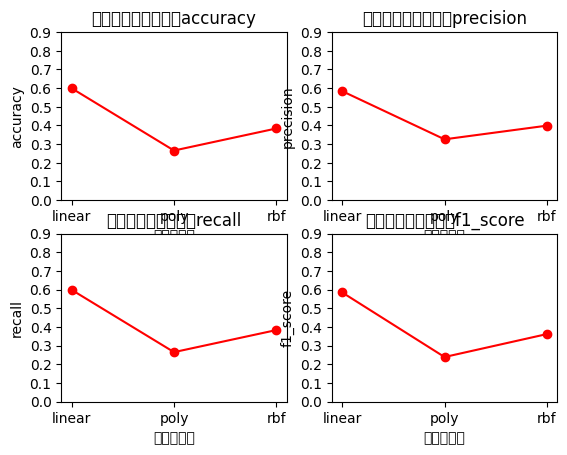

None
决策树：
method.predict:0.700674
{'3': {'precision': 0.9375, 'recall': 0.9375, 'f1-score': 0.9375, 'support': 160}, '4': {'precision': 0.7172774869109948, 'recall': 0.8011695906432749, 'f1-score': 0.7569060773480663, 'support': 171}, '5': {'precision': 0.5142857142857142, 'recall': 0.4114285714285714, 'f1-score': 0.45714285714285713, 'support': 175}, '6': {'precision': 0.417910447761194, 'recall': 0.48, 'f1-score': 0.44680851063829785, 'support': 175}, '7': {'precision': 0.718562874251497, 'recall': 0.6593406593406593, 'f1-score': 0.6876790830945558, 'support': 182}, '8': {'precision': 0.9166666666666666, 'recall': 0.9375, 'f1-score': 0.9269662921348315, 'support': 176}, 'accuracy': 0.7006737247353224, 'macro avg': {'precision': 0.7037005316460111, 'recall': 0.7044898035687509, 'f1-score': 0.7021671367264347, 'support': 1039}, 'weighted avg': {'precision': 0.700578012576607, 'recall': 0.7006737247353224, 'f1-score': 0.6986776603726286, 'support': 1039}}
method.predict:0.732435
{'3': {

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26641 (\N{CJK UNIFIED IDEOGRAPH-6811}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

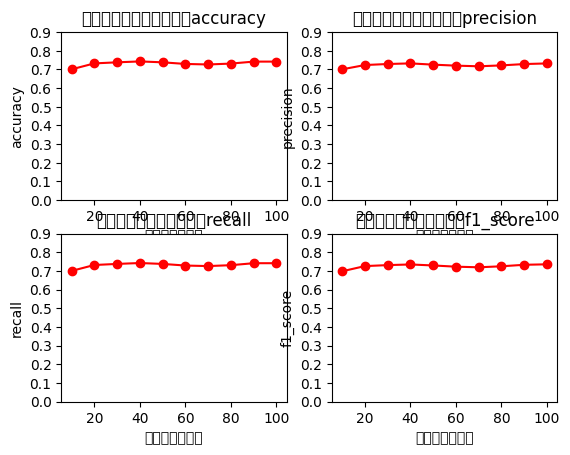

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


None
提升树：
迭代次数为：100
学习率：0.10
训练集score：0.583161
测试集score：0.561116
[0.         0.34078649 0.         0.00389715 0.04746833 0.
 0.04461377 0.02135873 0.01435912 0.24038736 0.28712905]
{'3': {'precision': 0.8384615384615385, 'recall': 0.68125, 'f1-score': 0.7517241379310344, 'support': 160}, '4': {'precision': 0.5047169811320755, 'recall': 0.6257309941520468, 'f1-score': 0.5587467362924283, 'support': 171}, '5': {'precision': 0.44654088050314467, 'recall': 0.4057142857142857, 'f1-score': 0.4251497005988024, 'support': 175}, '6': {'precision': 0.42021276595744683, 'recall': 0.4514285714285714, 'f1-score': 0.43526170798898073, 'support': 175}, '7': {'precision': 0.54375, 'recall': 0.47802197802197804, 'f1-score': 0.5087719298245613, 'support': 182}, '8': {'precision': 0.6842105263157895, 'recall': 0.7386363636363636, 'f1-score': 0.7103825136612022, 'support': 176}, 'accuracy': 0.5611164581328201, 'macro avg': {'precision': 0.5729821153949991, 'recall': 0.5634636988255409, 'f1-score': 0.56500

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集score：0.591003
测试集score：0.564966
[0.         0.35389222 0.         0.01198415 0.05000687 0.00275084
 0.09171957 0.02156703 0.03422754 0.18801007 0.24584171]
{'3': {'precision': 0.8515625, 'recall': 0.68125, 'f1-score': 0.7569444444444445, 'support': 160}, '4': {'precision': 0.5138888888888888, 'recall': 0.6491228070175439, 'f1-score': 0.5736434108527132, 'support': 171}, '5': {'precision': 0.4782608695652174, 'recall': 0.44, 'f1-score': 0.4583333333333333, 'support': 175}, '6': {'precision': 0.42934782608695654, 'recall': 0.4514285714285714, 'f1-score': 0.44011142061281333, 'support': 175}, '7': {'precision': 0.49295774647887325, 'recall': 0.5769230769230769, 'f1-score': 0.5316455696202531, 'support': 182}, '8': {'precision': 0.7737226277372263, 'recall': 0.6022727272727273, 'f1-score': 0.6773162939297126, 'support': 176}, 'accuracy': 0.5649663137632339, 'macro avg': {'precision': 0.5899567431261937, 'recall': 0.5668328637736533, 'f1-score': 0.5729990787988783, 'support': 1039}, 'we

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集score：0.567891
测试集score：0.530318
[0.         0.33660255 0.         0.0093165  0.06268286 0.00345146
 0.11094534 0.02329569 0.03090089 0.18881624 0.23398847]
{'3': {'precision': 0.8461538461538461, 'recall': 0.61875, 'f1-score': 0.7148014440433214, 'support': 160}, '4': {'precision': 0.46919431279620855, 'recall': 0.5789473684210527, 'f1-score': 0.5183246073298429, 'support': 171}, '5': {'precision': 0.43617021276595747, 'recall': 0.4685714285714286, 'f1-score': 0.4517906336088154, 'support': 175}, '6': {'precision': 0.4147727272727273, 'recall': 0.41714285714285715, 'f1-score': 0.41595441595441596, 'support': 175}, '7': {'precision': 0.47560975609756095, 'recall': 0.6428571428571429, 'f1-score': 0.5467289719626168, 'support': 182}, '8': {'precision': 0.801980198019802, 'recall': 0.4602272727272727, 'f1-score': 0.5848375451263538, 'support': 176}, 'accuracy': 0.5303176130895092, 'macro avg': {'precision': 0.5739801755176837, 'recall': 0.5310826782866256, 'f1-score': 0.538739603004227

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集score：0.588114
测试集score：0.538980
[0.01015589 0.32426371 0.00248111 0.01896358 0.05945852 0.01100567
 0.0900196  0.02068026 0.03799251 0.1794799  0.24549925]
{'3': {'precision': 0.8943089430894309, 'recall': 0.6875, 'f1-score': 0.7773851590106008, 'support': 160}, '4': {'precision': 0.4975845410628019, 'recall': 0.6023391812865497, 'f1-score': 0.544973544973545, 'support': 171}, '5': {'precision': 0.4, 'recall': 0.45714285714285713, 'f1-score': 0.42666666666666664, 'support': 175}, '6': {'precision': 0.43558282208588955, 'recall': 0.4057142857142857, 'f1-score': 0.42011834319526625, 'support': 175}, '7': {'precision': 0.47085201793721976, 'recall': 0.5769230769230769, 'f1-score': 0.5185185185185185, 'support': 182}, '8': {'precision': 0.7398373983739838, 'recall': 0.5170454545454546, 'f1-score': 0.6086956521739131, 'support': 176}, 'accuracy': 0.5389797882579404, 'macro avg': {'precision': 0.5730276204248878, 'recall': 0.541110809268704, 'f1-score': 0.5493929807564184, 'support': 103

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集score：0.560050
测试集score：0.526468
[0.00865742 0.31805723 0.00155805 0.01829601 0.05556707 0.01139189
 0.08691806 0.03368287 0.03632206 0.17888997 0.25065936]
{'3': {'precision': 0.9238095238095239, 'recall': 0.60625, 'f1-score': 0.7320754716981133, 'support': 160}, '4': {'precision': 0.4732142857142857, 'recall': 0.6198830409356725, 'f1-score': 0.5367088607594936, 'support': 171}, '5': {'precision': 0.38219895287958117, 'recall': 0.41714285714285715, 'f1-score': 0.39890710382513667, 'support': 175}, '6': {'precision': 0.42045454545454547, 'recall': 0.4228571428571429, 'f1-score': 0.42165242165242167, 'support': 175}, '7': {'precision': 0.4588235294117647, 'recall': 0.42857142857142855, 'f1-score': 0.4431818181818181, 'support': 182}, '8': {'precision': 0.6878612716763006, 'recall': 0.6761363636363636, 'f1-score': 0.681948424068768, 'support': 176}, 'accuracy': 0.5264677574590952, 'macro avg': {'precision': 0.5577270181576669, 'recall': 0.5284734721905775, 'f1-score': 0.53574568336429

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集score：0.577796
测试集score：0.554379
[0.02583804 0.27702014 0.00566272 0.01663981 0.05885417 0.01056572
 0.08759728 0.03277716 0.04204977 0.19646533 0.24652986]
{'3': {'precision': 0.9230769230769231, 'recall': 0.825, 'f1-score': 0.8712871287128713, 'support': 160}, '4': {'precision': 0.48497854077253216, 'recall': 0.6608187134502924, 'f1-score': 0.5594059405940595, 'support': 171}, '5': {'precision': 0.423728813559322, 'recall': 0.2857142857142857, 'f1-score': 0.341296928327645, 'support': 175}, '6': {'precision': 0.4504950495049505, 'recall': 0.52, 'f1-score': 0.4827586206896552, 'support': 175}, '7': {'precision': 0.4716981132075472, 'recall': 0.5494505494505495, 'f1-score': 0.5076142131979696, 'support': 182}, '8': {'precision': 0.6870229007633588, 'recall': 0.5113636363636364, 'f1-score': 0.5863192182410425, 'support': 176}, 'accuracy': 0.5543792107795957, 'macro avg': {'precision': 0.5735000568141057, 'recall': 0.5587245308297939, 'f1-score': 0.5581136749605405, 'support': 1039}, 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集score：0.562113
测试集score：0.512993
[0.02425933 0.2820863  0.0059006  0.02166488 0.06041176 0.02249111
 0.0596087  0.02893143 0.04514468 0.19475535 0.25474585]
{'3': {'precision': 0.9411764705882353, 'recall': 0.7, 'f1-score': 0.8028673835125448, 'support': 160}, '4': {'precision': 0.43283582089552236, 'recall': 0.6783625730994152, 'f1-score': 0.5284738041002278, 'support': 171}, '5': {'precision': 0.34507042253521125, 'recall': 0.28, 'f1-score': 0.30914826498422715, 'support': 175}, '6': {'precision': 0.3942857142857143, 'recall': 0.3942857142857143, 'f1-score': 0.3942857142857143, 'support': 175}, '7': {'precision': 0.44559585492227977, 'recall': 0.4725274725274725, 'f1-score': 0.45866666666666667, 'support': 182}, '8': {'precision': 0.7112676056338029, 'recall': 0.5738636363636364, 'f1-score': 0.6352201257861636, 'support': 176}, 'accuracy': 0.5129932627526468, 'macro avg': {'precision': 0.5450386481434609, 'recall': 0.5165065660460397, 'f1-score': 0.5214436598892574, 'support': 103

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集score：0.581923
测试集score：0.545717
[0.04083734 0.2354465  0.00591408 0.03112779 0.07700305 0.03039809
 0.07227934 0.02971731 0.05908867 0.18772199 0.23046584]
{'3': {'precision': 0.9147286821705426, 'recall': 0.7375, 'f1-score': 0.8166089965397924, 'support': 160}, '4': {'precision': 0.46153846153846156, 'recall': 0.631578947368421, 'f1-score': 0.5333333333333333, 'support': 171}, '5': {'precision': 0.4701492537313433, 'recall': 0.36, 'f1-score': 0.4077669902912621, 'support': 175}, '6': {'precision': 0.37383177570093457, 'recall': 0.45714285714285713, 'f1-score': 0.41131105398457585, 'support': 175}, '7': {'precision': 0.4888888888888889, 'recall': 0.4835164835164835, 'f1-score': 0.4861878453038674, 'support': 182}, '8': {'precision': 0.7432432432432432, 'recall': 0.625, 'f1-score': 0.6790123456790123, 'support': 176}, 'accuracy': 0.5457170356111646, 'macro avg': {'precision': 0.5753967175455691, 'recall': 0.549123048004627, 'f1-score': 0.5557034275219739, 'support': 1039}, 'weighted

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

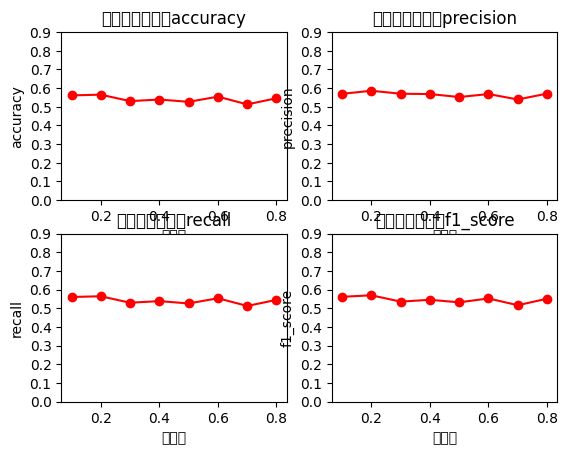

None
k近邻：
{'3': {'precision': 0.856353591160221, 'recall': 0.96875, 'f1-score': 0.9090909090909091, 'support': 160}, '4': {'precision': 0.7422680412371134, 'recall': 0.8421052631578947, 'f1-score': 0.7890410958904109, 'support': 171}, '5': {'precision': 0.5483870967741935, 'recall': 0.4857142857142857, 'f1-score': 0.5151515151515151, 'support': 175}, '6': {'precision': 0.40816326530612246, 'recall': 0.22857142857142856, 'f1-score': 0.29304029304029305, 'support': 175}, '7': {'precision': 0.6941747572815534, 'recall': 0.7857142857142857, 'f1-score': 0.7371134020618556, 'support': 182}, '8': {'precision': 0.7658536585365854, 'recall': 0.8920454545454546, 'f1-score': 0.8241469816272966, 'support': 176}, 'accuracy': 0.6968238691049086, 'macro avg': {'precision': 0.6692000683826316, 'recall': 0.7004834529505581, 'f1-score': 0.6779306994770468, 'support': 1039}, 'weighted avg': {'precision': 0.6664781258218659, 'recall': 0.6968238691049086, 'f1-score': 0.674705146513026, 'support': 1039}}
{'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


{'3': {'precision': 0.631578947368421, 'recall': 0.825, 'f1-score': 0.7154471544715447, 'support': 160}, '4': {'precision': 0.5764705882352941, 'recall': 0.5730994152046783, 'f1-score': 0.5747800586510263, 'support': 171}, '5': {'precision': 0.5874125874125874, 'recall': 0.48, 'f1-score': 0.5283018867924527, 'support': 175}, '6': {'precision': 0.4268292682926829, 'recall': 0.2, 'f1-score': 0.27237354085603116, 'support': 175}, '7': {'precision': 0.5944444444444444, 'recall': 0.5879120879120879, 'f1-score': 0.5911602209944752, 'support': 182}, '8': {'precision': 0.5725490196078431, 'recall': 0.8295454545454546, 'f1-score': 0.6774941995359629, 'support': 176}, 'accuracy': 0.5794032723772858, 'macro avg': {'precision': 0.5648808092268789, 'recall': 0.5825928262770369, 'f1-score': 0.559926176883582, 'support': 1039}, 'weighted avg': {'precision': 0.564079829889773, 'recall': 0.5794032723772858, 'f1-score': 0.5579473281256798, 'support': 1039}}


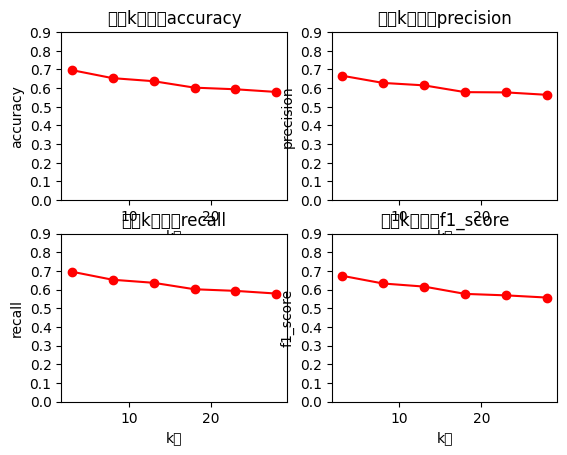

<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


None
随机森林：
特征重要性： [0.05812022 0.11740931 0.0711264  0.05770346 0.10851836 0.07705041
 0.08887757 0.06172264 0.08661527 0.12106869 0.15178767]
acc: 0.7776708373435997
{'3': {'precision': 0.9298245614035088, 'recall': 0.99375, 'f1-score': 0.9607250755287008, 'support': 160}, '4': {'precision': 0.782608695652174, 'recall': 0.9473684210526315, 'f1-score': 0.8571428571428571, 'support': 171}, '5': {'precision': 0.6341463414634146, 'recall': 0.5942857142857143, 'f1-score': 0.6135693215339233, 'support': 175}, '6': {'precision': 0.5079365079365079, 'recall': 0.3657142857142857, 'f1-score': 0.42524916943521596, 'support': 175}, '7': {'precision': 0.7575757575757576, 'recall': 0.8241758241758241, 'f1-score': 0.7894736842105263, 'support': 182}, '8': {'precision': 0.976878612716763, 'recall': 0.9602272727272727, 'f1-score': 0.9684813753581661, 'support': 176}, 'accuracy': 0.7776708373435997, 'macro avg': {'precision': 0.7648284127913544, 'recall': 0.7809202529926212, 'f1-score': 0.76910691386823

<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


特征重要性： [0.05353852 0.12511453 0.0733795  0.06218561 0.10752922 0.07318655
 0.10456411 0.06445076 0.07848469 0.12010466 0.13746184]
acc: 0.8248315688161694
{'3': {'precision': 0.975609756097561, 'recall': 1.0, 'f1-score': 0.9876543209876543, 'support': 160}, '4': {'precision': 0.8274111675126904, 'recall': 0.9532163742690059, 'f1-score': 0.8858695652173914, 'support': 171}, '5': {'precision': 0.6882352941176471, 'recall': 0.6685714285714286, 'f1-score': 0.6782608695652175, 'support': 175}, '6': {'precision': 0.6204379562043796, 'recall': 0.4857142857142857, 'f1-score': 0.5448717948717948, 'support': 175}, '7': {'precision': 0.8144329896907216, 'recall': 0.8681318681318682, 'f1-score': 0.8404255319148937, 'support': 182}, '8': {'precision': 0.9830508474576272, 'recall': 0.9886363636363636, 'f1-score': 0.9858356940509915, 'support': 176}, 'accuracy': 0.8248315688161694, 'macro avg': {'precision': 0.8181963351801045, 'recall': 0.827378386720492, 'f1-score': 0.8204862961013237, 'support': 1

<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


特征重要性： [0.05605127 0.12191348 0.07030071 0.06188104 0.11162573 0.07352695
 0.10852411 0.0647038  0.07396347 0.12011686 0.13739257]
acc: 0.8238691049085659
{'3': {'precision': 0.963855421686747, 'recall': 1.0, 'f1-score': 0.9815950920245399, 'support': 160}, '4': {'precision': 0.8526315789473684, 'recall': 0.9473684210526315, 'f1-score': 0.8975069252077563, 'support': 171}, '5': {'precision': 0.6845238095238095, 'recall': 0.6571428571428571, 'f1-score': 0.6705539358600583, 'support': 175}, '6': {'precision': 0.6159420289855072, 'recall': 0.4857142857142857, 'f1-score': 0.5431309904153354, 'support': 175}, '7': {'precision': 0.8059701492537313, 'recall': 0.8901098901098901, 'f1-score': 0.845953002610966, 'support': 182}, '8': {'precision': 0.9772727272727273, 'recall': 0.9772727272727273, 'f1-score': 0.9772727272727273, 'support': 176}, 'accuracy': 0.8238691049085659, 'macro avg': {'precision': 0.8166992859449818, 'recall': 0.8262680302153985, 'f1-score': 0.8193354455652305, 'support': 1

<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


特征重要性： [0.0574752  0.1179855  0.06905365 0.06129976 0.10981561 0.0733641
 0.11137861 0.0647961  0.07577661 0.12113425 0.13792062]
acc: 0.8334937439846006
{'3': {'precision': 0.963855421686747, 'recall': 1.0, 'f1-score': 0.9815950920245399, 'support': 160}, '4': {'precision': 0.8617021276595744, 'recall': 0.9473684210526315, 'f1-score': 0.9025069637883008, 'support': 171}, '5': {'precision': 0.7116564417177914, 'recall': 0.6628571428571428, 'f1-score': 0.6863905325443788, 'support': 175}, '6': {'precision': 0.64, 'recall': 0.5485714285714286, 'f1-score': 0.5907692307692308, 'support': 175}, '7': {'precision': 0.8247422680412371, 'recall': 0.8791208791208791, 'f1-score': 0.851063829787234, 'support': 182}, '8': {'precision': 0.9662921348314607, 'recall': 0.9772727272727273, 'f1-score': 0.9717514124293786, 'support': 176}, 'accuracy': 0.8334937439846006, 'macro avg': {'precision': 0.8280413989894685, 'recall': 0.8358650998124681, 'f1-score': 0.8306795102238439, 'support': 1039}, 'weighted

<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


特征重要性： [0.05907532 0.1202696  0.06849174 0.06029517 0.1130116  0.07176628
 0.11184574 0.06448075 0.07578864 0.12087783 0.13409734]
acc: 0.8344562078922041
{'3': {'precision': 0.9815950920245399, 'recall': 1.0, 'f1-score': 0.9907120743034055, 'support': 160}, '4': {'precision': 0.8316326530612245, 'recall': 0.9532163742690059, 'f1-score': 0.8882833787465939, 'support': 171}, '5': {'precision': 0.7151515151515152, 'recall': 0.6742857142857143, 'f1-score': 0.6941176470588236, 'support': 175}, '6': {'precision': 0.6458333333333334, 'recall': 0.5314285714285715, 'f1-score': 0.5830721003134797, 'support': 175}, '7': {'precision': 0.8247422680412371, 'recall': 0.8791208791208791, 'f1-score': 0.851063829787234, 'support': 182}, '8': {'precision': 0.9774011299435028, 'recall': 0.9829545454545454, 'f1-score': 0.9801699716713881, 'support': 176}, 'accuracy': 0.8344562078922041, 'macro avg': {'precision': 0.8293926652592254, 'recall': 0.8368343474264526, 'f1-score': 0.8312365003134875, 'support': 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


特征重要性： [0.06050796 0.12267337 0.06937415 0.05934638 0.10959364 0.07049173
 0.11222194 0.06545638 0.07584454 0.12050574 0.13398417]
acc: 0.8373435996150145
{'3': {'precision': 0.9815950920245399, 'recall': 1.0, 'f1-score': 0.9907120743034055, 'support': 160}, '4': {'precision': 0.844559585492228, 'recall': 0.9532163742690059, 'f1-score': 0.8956043956043956, 'support': 171}, '5': {'precision': 0.6878612716763006, 'recall': 0.68, 'f1-score': 0.6839080459770116, 'support': 175}, '6': {'precision': 0.6691176470588235, 'recall': 0.52, 'f1-score': 0.5852090032154341, 'support': 175}, '7': {'precision': 0.8307692307692308, 'recall': 0.8901098901098901, 'f1-score': 0.8594164456233421, 'support': 182}, '8': {'precision': 0.9776536312849162, 'recall': 0.9943181818181818, 'f1-score': 0.9859154929577464, 'support': 176}, 'accuracy': 0.8373435996150145, 'macro avg': {'precision': 0.8319260763843398, 'recall': 0.8396074076995129, 'f1-score': 0.8334609096135558, 'support': 1039}, 'weighted avg': {'pre

<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
<ipython-input-23-42818b7c8e99>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


特征重要性： [0.06044389 0.12473033 0.06984077 0.05869208 0.10538372 0.07026141
 0.11218887 0.06572951 0.07515678 0.1209883  0.13658435]
acc: 0.8411934552454283
{'3': {'precision': 0.9815950920245399, 'recall': 1.0, 'f1-score': 0.9907120743034055, 'support': 160}, '4': {'precision': 0.8497409326424871, 'recall': 0.9590643274853801, 'f1-score': 0.9010989010989011, 'support': 171}, '5': {'precision': 0.7017543859649122, 'recall': 0.6857142857142857, 'f1-score': 0.6936416184971098, 'support': 175}, '6': {'precision': 0.6666666666666666, 'recall': 0.5257142857142857, 'f1-score': 0.5878594249201278, 'support': 175}, '7': {'precision': 0.8402061855670103, 'recall': 0.8956043956043956, 'f1-score': 0.8670212765957447, 'support': 182}, '8': {'precision': 0.9722222222222222, 'recall': 0.9943181818181818, 'f1-score': 0.9831460674157303, 'support': 176}, 'accuracy': 0.8411934552454283, 'macro avg': {'precision': 0.8353642475146397, 'recall': 0.8434025793894215, 'f1-score': 0.8372465604718365, 'support':

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


特征重要性： [0.06061988 0.12671515 0.06973347 0.05857812 0.1060358  0.06930579
 0.11172098 0.06588582 0.07439697 0.12134428 0.13566374]
acc: 0.8383060635226179
{'3': {'precision': 0.9815950920245399, 'recall': 1.0, 'f1-score': 0.9907120743034055, 'support': 160}, '4': {'precision': 0.8586387434554974, 'recall': 0.9590643274853801, 'f1-score': 0.9060773480662984, 'support': 171}, '5': {'precision': 0.6931818181818182, 'recall': 0.6971428571428572, 'f1-score': 0.6951566951566952, 'support': 175}, '6': {'precision': 0.6666666666666666, 'recall': 0.5028571428571429, 'f1-score': 0.5732899022801302, 'support': 175}, '7': {'precision': 0.826530612244898, 'recall': 0.8901098901098901, 'f1-score': 0.8571428571428572, 'support': 182}, '8': {'precision': 0.9668508287292817, 'recall': 0.9943181818181818, 'f1-score': 0.9803921568627451, 'support': 176}, 'accuracy': 0.8383060635226179, 'macro avg': {'precision': 0.832243960217117, 'recall': 0.8405820665689087, 'f1-score': 0.8337951723020218, 'support': 1

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26641 (\N{CJK UNIFIED IDEOGRAPH-6811}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

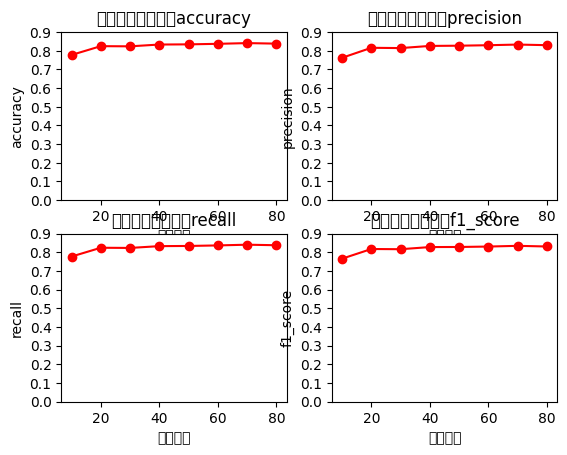

None


In [23]:
def func_randomforest(X_train, X_test, y_train, y_test):
    print("随机森林：")
    t_precision = []
    t_recall = []
    t_accuracy = []
    t_f1_score = []
    kk = [10, 20, 30, 40, 50, 60, 70, 80]  # 默认树的数量
    for n in kk:
        clf = RandomForestClassifier(n_estimators=n, max_depth=100, min_samples_split=2, random_state=10, verbose=True)
        clf.fit(X_train, y_train)
        predic = clf.predict(X_test)

        print("特征重要性：", clf.feature_importances_)
        print("acc:", clf.score(X_test, y_test))

        t = classification_report(y_test, predic, target_names=['3', '4', '5', '6', '7', '8'], output_dict=True)
        print(t)
        t_accuracy.append(t["accuracy"])
        t_precision.append(t["weighted avg"]["precision"])
        t_recall.append(t["weighted avg"]["recall"])
        t_f1_score.append(t["weighted avg"]["f1-score"])
    plt.figure("数据未处理深度100（随机森林）")
    plt.subplot(2, 2, 1)
    # 添加文本 #x轴文本
    plt.xlabel('树的数量')
    # y轴文本
    plt.ylabel('accuracy')
    # 标题
    plt.title('不同树的数量下的accuracy')
    plt.plot(kk, t_accuracy, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 2)
    # 添加文本 #x轴文本
    plt.xlabel('树的数量')
    # y轴文本
    plt.ylabel('precision')
    # 标题
    plt.title('不同树的数量下的precision')
    plt.plot(kk, t_precision, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 3)
    # 添加文本 #x轴文本
    plt.xlabel('树的数量')
    # y轴文本
    plt.ylabel('recall')
    # 标题
    plt.title('不同树的数量下的recall')
    plt.plot(kk, t_recall, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.subplot(2, 2, 4)
    # 添加文本 #x轴文本
    plt.xlabel('树的数量')
    # y轴文本
    plt.ylabel('f1_score')
    # 标题
    plt.title('不同树的数量下的f1_score')
    plt.plot(kk, t_f1_score, color="r", marker="o", ls="-")
    plt.yticks(np.arange(0, 1, 0.1))

    plt.show()


if __name__ == '__main__':
    # 神经网络
    #print(func_mlp(X_train, X_test, y_train, y_test))
    # 向量机
    print(func_svc(X_train, X_test, y_train, y_test))
    # 决策树
    print(func_classtree(X_train, X_test, y_train, y_test))
    # 提升树
    print(func_adaboost(X_train, X_test, y_train, y_test))
    # knn
    print(func_knn(X_train, X_test, y_train, y_test))
    # randomforest
    print(func_randomforest(X_train, X_test, y_train, y_test))
